# Importing a file from the internet

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
%matplotlib inline

In [6]:
url = "https://raw.githubusercontent.com/fivethirtyeight/data/master/college-majors/recent-grads.csv"

In [7]:
df = pd.read_csv(url)
df.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


### DATA CLEANING

In [8]:
# Dataframe to csv
df.to_csv("file.csv", index = False)

In [9]:
# To remove the ... on any part of the dataframe.

pd.set_option("display.max.columns", None)

In [10]:
df.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [11]:
# To view all the columns heading in the dataframe

df.columns

Index(['Rank', 'Major_code', 'Major', 'Total', 'Men', 'Women',
       'Major_category', 'ShareWomen', 'Sample_size', 'Employed', 'Full_time',
       'Part_time', 'Full_time_year_round', 'Unemployed', 'Unemployment_rate',
       'Median', 'P25th', 'P75th', 'College_jobs', 'Non_college_jobs',
       'Low_wage_jobs'],
      dtype='object')

In [12]:
# to know the numbers of rows and columns in the dataframe

df.shape

(173, 21)

In [13]:
# to list out the the numbers of none_value (NA) in the dataframe

df.isna().sum()

Rank                    0
Major_code              0
Major                   0
Total                   1
Men                     1
Women                   1
Major_category          0
ShareWomen              1
Sample_size             0
Employed                0
Full_time               0
Part_time               0
Full_time_year_round    0
Unemployed              0
Unemployment_rate       0
Median                  0
P25th                   0
P75th                   0
College_jobs            0
Non_college_jobs        0
Low_wage_jobs           0
dtype: int64

In [14]:
# to know the types of the datas in the dataframe; int,objects, floats.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  173 non-null    int64  
 1   Major_code            173 non-null    int64  
 2   Major                 173 non-null    object 
 3   Total                 172 non-null    float64
 4   Men                   172 non-null    float64
 5   Women                 172 non-null    float64
 6   Major_category        173 non-null    object 
 7   ShareWomen            172 non-null    float64
 8   Sample_size           173 non-null    int64  
 9   Employed              173 non-null    int64  
 10  Full_time             173 non-null    int64  
 11  Part_time             173 non-null    int64  
 12  Full_time_year_round  173 non-null    int64  
 13  Unemployed            173 non-null    int64  
 14  Unemployment_rate     173 non-null    float64
 15  Median                1

In [15]:
# to replace the missing values (NA) in the men column with the mean value of the column.
# round(df["Men"].mean() ------- function to use
# round(df["Men"].mean(), 2) ------ function to round up to 2 decimal place. that is why we have the "round" and "2"

mean_men = round(df["Men"].mean(), 2)
df["Men"] = df["Men"].fillna(mean_men)

In [17]:
# to view all NA in the dataframe.

nan = df.isna().sum().reset_index()
nan.columns = ["variables", "count"]
nan.head(10)

,variables,count
0,Rank,0
1,Major_code,0
2,Major,0
3,Total,1
4,Men,0
5,Women,1
6,Major_category,0
7,ShareWomen,1
8,Sample_size,0
9,Employed,0


In [21]:
# putting all the missing value in an array to work on

missing = nan[nan["count"] > 0]
m_s=np.array(missing["variables"])
m_s

array(['Total', 'Women', 'ShareWomen'], dtype=object)

In [24]:
# using a for loop to convert all missing value with the mean of their column

for i in m_s:
    mean_men = round(df[i].mean(), 2)
    df[i] = df[i].fillna(mean_men)

In [25]:
# at this point, no more missing values in the dataframe
df.isna().sum()

Rank                    0
Major_code              0
Major                   0
Total                   0
Men                     0
Women                   0
Major_category          0
ShareWomen              0
Sample_size             0
Employed                0
Full_time               0
Part_time               0
Full_time_year_round    0
Unemployed              0
Unemployment_rate       0
Median                  0
P25th                   0
P75th                   0
College_jobs            0
Non_college_jobs        0
Low_wage_jobs           0
dtype: int64

In [29]:
pet_df = df[df["Major_category"] == "Engineering"]
#pet_df
range_val = pet_df[(pet_df.Total >= 1000) & (pet_df.Total <= 3000)]
range_val

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
5,6,2418,NUCLEAR ENGINEERING,2573.0,2200.0,373.0,Engineering,0.144967,17,1857,2038,264,1449,400,0.177226,65000,50000,102000,1142,657,244
18,19,2403,ARCHITECTURAL ENGINEERING,2825.0,1835.0,990.0,Engineering,0.350442,26,2575,2277,343,1848,170,0.061931,54000,38000,65000,1665,649,137
23,24,2413,MATERIALS ENGINEERING AND MATERIALS SCIENCE,2993.0,2020.0,973.0,Engineering,0.325092,22,2449,1658,1040,1151,70,0.027789,52000,35000,62000,1911,305,70
50,51,2501,ENGINEERING AND INDUSTRIAL MANAGEMENT,2906.0,2400.0,506.0,Engineering,0.174123,29,2125,1992,462,1358,74,0.033652,44000,30000,50000,482,844,245


# PLOTTING AND VISUALIZING

<AxesSubplot:xlabel='Rank'>

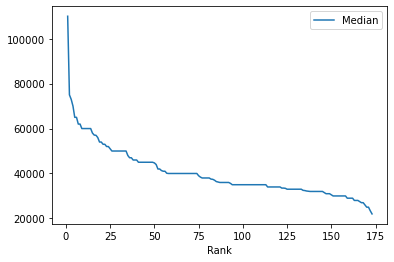

In [30]:
# visualizing with a plot, method 1 using pandas

df.plot(x="Rank", y="Median")

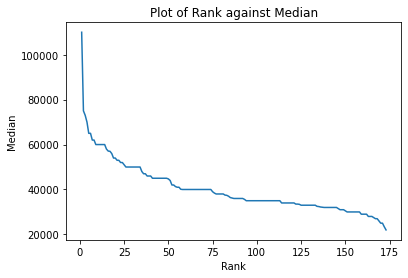

In [26]:
# visualizing with a plot, method 2 using matplotlib.pyplot

plt.title("Plot of Rank against Median")
plt.xlabel("Rank")
plt.ylabel("Median")
plt.plot(df["Rank"], df["Median"])

<AxesSubplot:xlabel='Rank'>

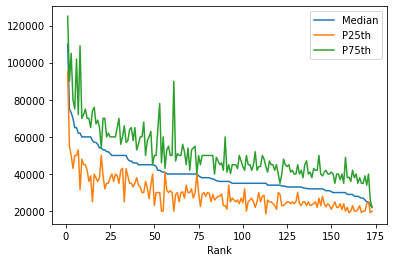

In [31]:
# multiple plots in thesame ling graph

df.plot(x="Rank", y=["Median", "P25th", "P75th"])

<AxesSubplot:ylabel='Frequency'>

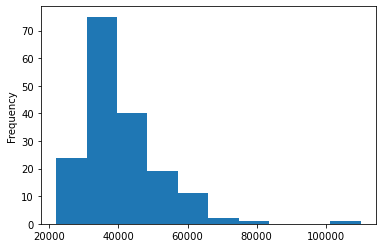

In [33]:
#ploting with histogram

df["Median"].plot(kind="hist")

In [33]:
top_values_by_median = df.sort_values(by="Median", ascending=False).head()
top_values_by_median

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


<AxesSubplot:xlabel='Major'>

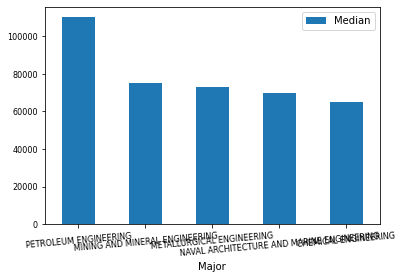

In [30]:
# bar plot

top_values_by_median.plot(x="Major", y="Median", kind="bar", rot=5, fontsize=8)

<AxesSubplot:ylabel='Major'>

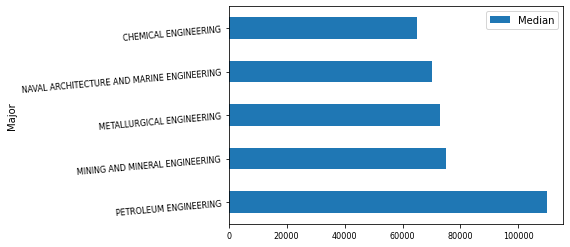

In [31]:
# to flip the bar plot, use "barh" instead of "bar" in KIND. colour blue is the default colour

top_values_by_median.plot(x="Major", y="Median", kind="barh", rot=5, fontsize=8)

<AxesSubplot:ylabel='Major'>

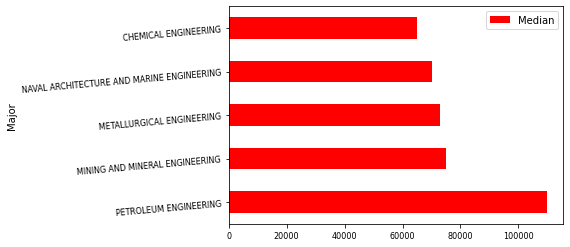

In [40]:
# to change color, add colour to the specification

top_values_by_median.plot(x="Major", y="Median", kind="barh", rot=5, fontsize=8, color="red")

<AxesSubplot:ylabel='Major'>

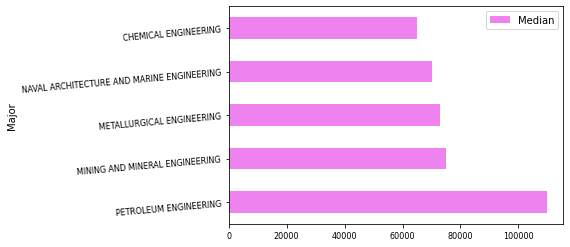

In [41]:
top_values_by_median.plot(x="Major", y="Median", kind="barh", rot=5, fontsize=8, color="violet")

<AxesSubplot:ylabel='Major'>

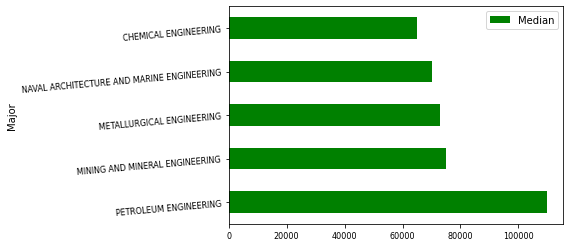

In [42]:
top_values_by_median.plot(x="Major", y="Median", kind="barh", rot=5, fontsize=8, color="green")

<AxesSubplot:>

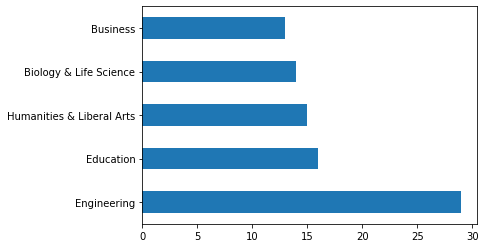

In [45]:
m_c = df["Major_category"].value_counts().head()
m_c.plot(kind="barh")

<AxesSubplot:>

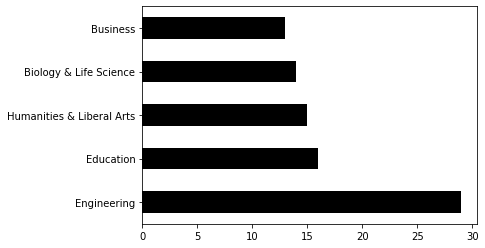

In [46]:
m_c = df["Major_category"].value_counts().head()
m_c.plot(kind="barh", color="black")

<AxesSubplot:xlabel='Major'>

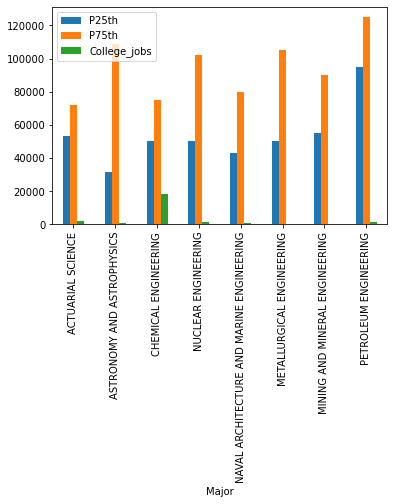

In [48]:
# to preview a multiple bar plot

top_median = df[df["Median"] > 60000].sort_values("Median")
top_median.plot(x="Major", y=["P25th", "P75th", "College_jobs"], kind="bar")

<AxesSubplot:ylabel='Major'>

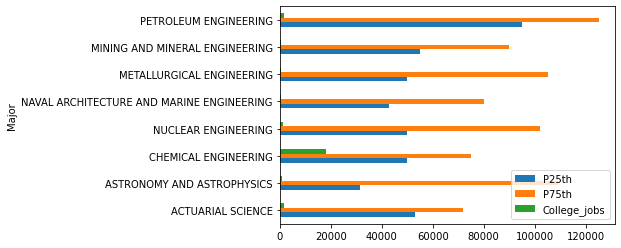

In [53]:
top_median = df[df["Median"] > 60000].sort_values("Median")
top_median.plot(x="Major", y=["P25th", "P75th", "College_jobs"], kind="barh")

<AxesSubplot:xlabel='Median', ylabel='Unemployment_rate'>

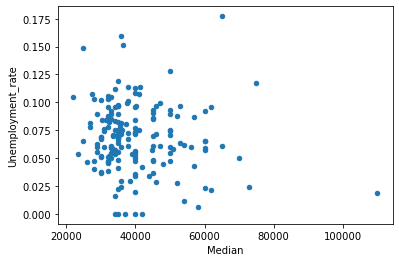

In [50]:
# to plot a scattered plot

df.plot(x="Median", y="Unemployment_rate", kind = "scatter")

<AxesSubplot:xlabel='Median', ylabel='Unemployment_rate'>

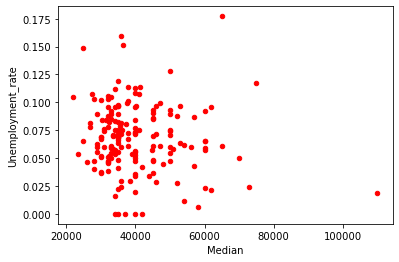

In [49]:
df.plot(x="Median", y="Unemployment_rate", kind = "scatter", color="red")

<AxesSubplot:xlabel='Major_category'>

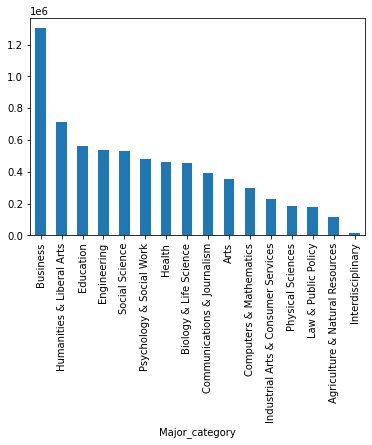

In [54]:
sum_group = df.groupby("Major_category")["Total"].sum().sort_values(ascending=False)
sum_group.plot(kind="bar")

<AxesSubplot:ylabel='Major_category'>

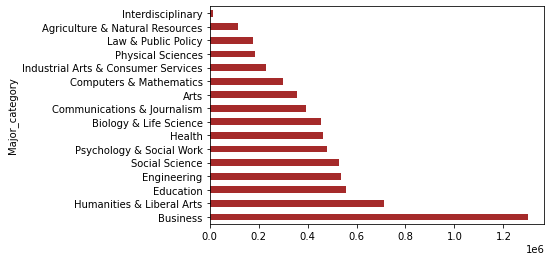

In [57]:
#grouping by, joining to columns together i.e. calculating to columns as one

sum_group = df.groupby("Major_category")["Total"].sum().sort_values(ascending=False)
sum_group.plot(kind="barh", color="brown")

<AxesSubplot:ylabel='Frequency'>

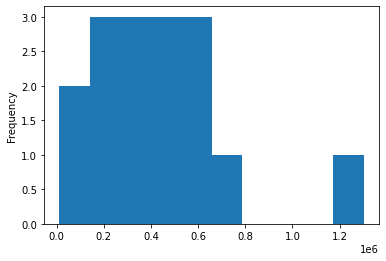

In [40]:
#group plot using histogram

sum_group.plot(kind="hist")

In [41]:
sum_group

Major_category
Business                               1302376.00
Humanities & Liberal Arts               713468.00
Education                               559129.00
Engineering                             537583.00
Social Science                          529966.00
Psychology & Social Work                481007.00
Health                                  463230.00
Biology & Life Science                  453862.00
Communications & Journalism             392601.00
Arts                                    357130.00
Computers & Mathematics                 299008.00
Industrial Arts & Consumer Services     229792.00
Physical Sciences                       185479.00
Law & Public Policy                     179107.00
Agriculture & Natural Resources         114990.08
Interdisciplinary                        12296.00
Name: Total, dtype: float64

In [42]:
big_sum = sum_group[sum_group > 300_000]

In [43]:
small_sum = sum_group[sum_group < 300_000]
small_sum

Major_category
Computers & Mathematics                299008.00
Industrial Arts & Consumer Services    229792.00
Physical Sciences                      185479.00
Law & Public Policy                    179107.00
Agriculture & Natural Resources        114990.08
Interdisciplinary                       12296.00
Name: Total, dtype: float64

In [44]:
# indexing small_sum as one and calling it others, so as to show it as others on the pie chart

others = pd.Series([small_sum.sum()], index=["Others"])
others

Others    1020672.08
dtype: float64

<AxesSubplot:ylabel='None'>

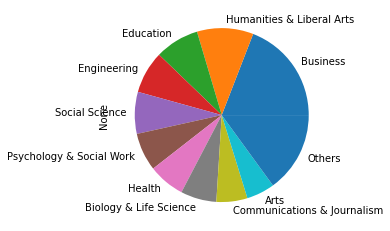

In [45]:
# plotting with pie chart

new_sum = big_sum.append(others)

new_sum.plot(kind="pie")